In [13]:
library('ggplot2')
library('plyr')
library('tidyr')
library('parallel')
library('lme4')
library("scales")
source('ss_analysis.R')


# Cross-Linguistic Correlations

In [ ]:
if exists('crosslinguistic_pic3.RData'){
    load('crosslinguistic_pic3.RData')
} 

## Google 1T

In [14]:
languages = c('ENGLISH',"SPANISH",'FRENCH', 'DUTCH', 'GERMAN','SWEDISH','CZECH','POLISH','ROMANIAN','ITALIAN','PORTUGUESE')
withoutEndMarker = lapply(languages, function(language){getScoresForLanguage(
    '/shared_hd2/models/ss/10-17-17_GoogleUnigram', 'Google1T','25000',language, endMarker=T,  corMethod='spearman', opusFilter=T)})

[1] "original number in ENGLISH: 49905"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in ENGLISH: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in SPANISH: 49916"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in SPANISH: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in FRENCH: 49826"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in FRENCH: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in DUTCH: 49910"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in DUTCH: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in GERMAN: 49705"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in GERMAN: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCod

In [ ]:
head(withoutEndMarker[[1]]$score)

In [15]:
g1t_corpusCounts = do.call('rbind',lapply(withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language= language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
g1t_corpusCounts

language,numTokens,numTokens_pretty,analysisCount
<chr>,<dbl>,<chr>,<int>
English,266164702912,"266,164,702,912",25000
Spanish,30898286985,"30,898,286,985",25000
French,27912351558,"27,912,351,558",25000
Dutch,24127675184,"24,127,675,184",25000
German,18753615866,"18,753,615,866",25000
Swedish,20544242586,"20,544,242,586",25000
Czech,16238032967,"16,238,032,967",25000
Polish,17915063215,"17,915,063,215",25000
Romanian,19659866198,"19,659,866,198",25000


In [16]:
nem = do.call('rbind', lapply(withoutEndMarker, function(x){x$score}))
nem$xv = expandColNames(nem$xv)
nem$yv = expandColNames(nem$yv)

nem$lv = nem$xv
nem$sv = nem$yv
#Better word-level metric names


nem = merge(nem,g1t_corpusCounts, by='language')
nem$language = as.factor(sapply(nem$language, simpleCap))
nem$languageCount = sapply(1:length(nem$language), function(x){paste0(nem$language[x], ' (', round(nem$numTokens[x] / 1000000000,0),'b)' )})
nem$yv_xv = paste(nem$yv, nem$xv, sep='-')

## Google Books 2012

In [17]:
books2012_languages = c('eng-all',"spa-all",'fre-all','ger-all','rus-all','heb-all', 'ita-all')
books2012_withoutEndMarker = lapply(books2012_languages, function(language){getScoresForLanguage('/shared_hd2/models/ss/10-17-17_GoogleUnigram','GoogleBooks2012','25000', language, endMarker=T,  corMethod='spearman', contextLimit=0, opusFilter=T)})
names(books2012_withoutEndMarker) = books2012_languages

[1] "original number in eng-all: 49942"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in eng-all: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in spa-all: 49975"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in spa-all: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in fre-all: 49975"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in fre-all: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in ger-all: 49989"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in ger-all: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in rus-all: 49990"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in rus-all: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "lan

In [18]:
gb12_corpusCounts = do.call('rbind',lapply(books2012_withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language = language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
gb12_corpusCounts$language = sapply(gb12_corpusCounts$language, function(x){
    gb12_langRemapper[[x]]
})

In [19]:
books2012.nem = do.call('rbind', lapply(books2012_withoutEndMarker, function(x){x$score}))
books2012.nem$xv = expandColNames(books2012.nem$xv)
books2012.nem$yv = expandColNames(books2012.nem$yv)
#Better word-level metric names

books2012.nem$lv = books2012.nem$xv
books2012.nem$sv = books2012.nem$yv


books2012.nem$language = sapply(books2012.nem$language, function(x){
    gb12_langRemapper[[x]]
})

books2012.nem = merge(books2012.nem,gb12_corpusCounts, by='language')
books2012.nem$language = factor(books2012.nem$language)
books2012.nem$languageCount = sapply(1:length(books2012.nem$language), function(x){paste0(books2012.nem$language[x], ' (', round(books2012.nem$numTokens[x] / 1000000000,0),'b)' )})
books2012.nem$yv_xv = paste(books2012.nem$yv, books2012.nem$xv, sep='-')

In [20]:
# hack to restore Hebrew entries rather than regenerate all the data
lv = c('Unigram Surprisal','Trigram Surprisal','Frequency')
sv = c('PIC - Phonemes', 'Number of Phonemes','Difference: PIC vs. No. Phonemes')
residualize =c(TRUE,FALSE)
eg_hebrew = expand.grid(lv, sv, residualize)

hebrew =  do.call('rbind', lapply(1:nrow(eg_hebrew), function(x){subset(books2012.nem, language == 'Hebrew')[1,]}))
hebrew$lv = eg_hebrew$Var1
hebrew$sv = eg_hebrew$Var2
hebrew$residualize = eg_hebrew$Var3
hebrew$direction = 'lower'
hebrew$pvalue = 0

books2012.nem = rbind(books2012.nem, hebrew)

## OPUS

In [21]:
opus_languages = c('en','ru','he','de','fr','es','cs','pt', 'pl','ro','sv','it','nl')
opus_withoutEndMarker = lapply(1:length(opus_languages), function(i){getScoresForLanguage('/shared_hd2/models/ss/10-17-17_GoogleUnigram','OPUS','25000',opus_languages[i], endMarker=T,  corMethod='spearman', opusFilter=T)})
names(opus_withoutEndMarker) = opus_languages

[1] "original number in en: 49888"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in en: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in ru: 49952"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in ru: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in he: 50000"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in he: 25000"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in de: 49956"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in de: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in fr: 49937"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in f

In [22]:
opus_corpusCounts = do.call('rbind',lapply(opus_withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language= language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
opus_corpusCounts

,language,numTokens,numTokens_pretty,analysisCount
,<chr>,<dbl>,<chr>,<int>
en,English,329906086,"329,906,086",25000
ru,Russian,42950666,"42,950,666",25000
he,Hebrew,65088282,"65,088,282",25000
de,German,39409031,"39,409,031",25000
fr,French,169303943,"169,303,943",25000
es,Spanish,197811726,"197,811,726",25000
cs,Czech,94730204,"94,730,204",25000
pt,Portuguese,105486083,"105,486,083",25000
pl,Polish,66770062,"66,770,062",25000


In [23]:
opus.nem = do.call('rbind', lapply(opus_withoutEndMarker, function(x){x$score}))
opus.nem$xv = expandColNames(opus.nem$xv)
opus.nem$yv = expandColNames(opus.nem$yv)

opus.nem$lv = opus.nem$xv
opus.nem$sv = opus.nem$yv


#Better word-level metric names
opus.nem = merge(opus.nem,opus_corpusCounts, by='language')
opus.nem$language = as.factor(sapply(opus.nem$language, simpleCap))
books2012.nem$yv_xv = paste(books2012.nem$yv, books2012.nem$xv, sep='-')
opus.nem$languageCount = sapply(1:length(opus.nem$language), function(x){paste0(opus.nem$language[x], ' (', round(opus.nem$numTokens[x] / 1000000000,0),'b)' )})                                                                          

In [24]:
opus_datasets = do.call('rbind',lapply(opus_withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
opus_datasets$dataset = 'OPUS'                      
                        
gb12_datasets = do.call('rbind',lapply(books2012_withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
gb12_datasets$dataset = 'GB12'

g1t_datasets = do.call('rbind',lapply(withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
g1t_datasets$dataset = 'G1T'

In [25]:
combined_datasets = rbind.fill(opus_datasets, gb12_datasets, g1t_datasets)
combined_datasets$dataset_language = paste0(combined_datasets$dataset, ': ', combined_datasets$language)

nem$languageLabel = paste('1T:', nem$languageCount)
books2012.nem$languageLabel = paste('GB12:', books2012.nem$languageCount)
opus.nem$languageLabel = paste('OPUS:', opus.nem$languageCount)
nem$dataset = '1T'
books2012.nem$dataset = 'GB12'
opus.nem$dataset = 'OPUS'
nem_combined = rbind.fill(nem, books2012.nem, opus.nem)

In [26]:
names(nem_combined)


[1] "language"         "yv"               "xv"               "resid_var"       
 [5] "meanBootstrap"    "singleCor"        "lower"            "upper"           
 [9] "pvalue"           "direction"        "corMethod"        "residualize"     
[13] "endMarker"        "lv"               "sv"               "numTokens"       
[17] "numTokens_pretty" "analysisCount"    "languageCount"    "yv_xv"           
[21] "languageLabel"    "dataset"

# Plot Correlations

Warning message:
“Ignoring unknown aesthetics: fill”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Ignoring unknown aesthetics: fill”
Warning message:
“Ignoring unknown aesthetics: fill”


png 
  2

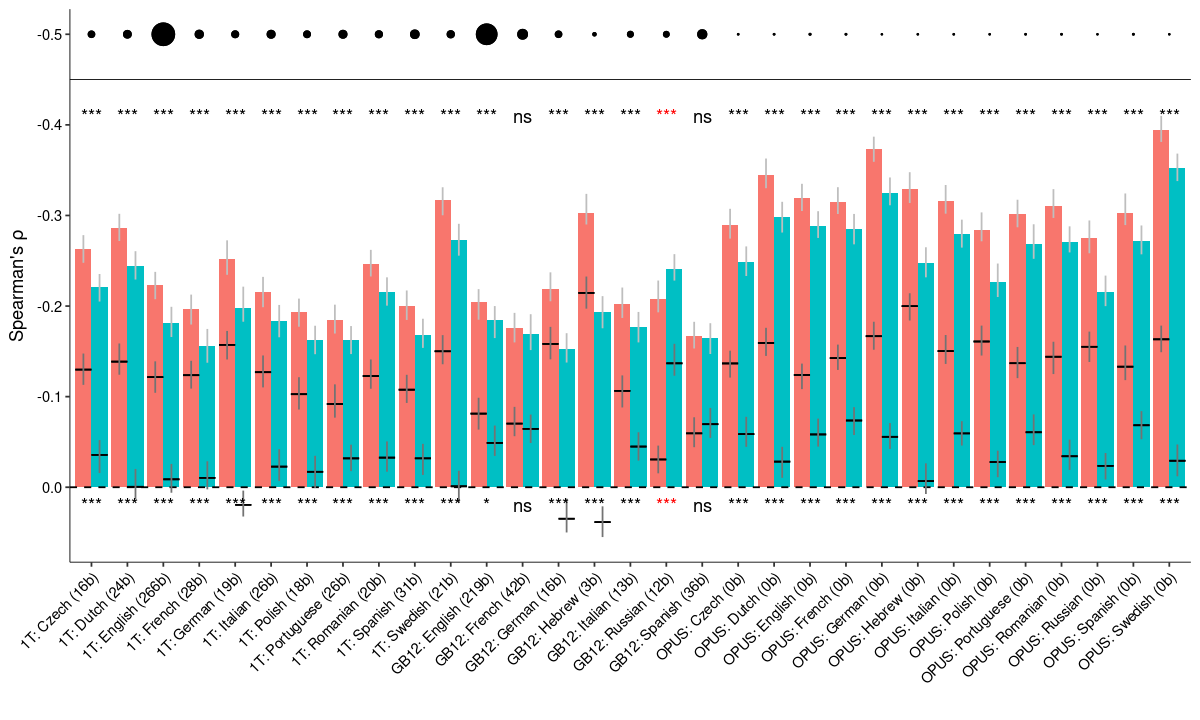

In [27]:
lv_list = c("Frequency")
sv_list = c("PIC - Characters","Number of Characters")
dodge <- position_dodge(width=0.9)

correlations = subset(nem_combined, lv %in% lv_list & sv %in% sv_list & !residualize)
partial_correlations = subset(nem_combined, lv %in% lv_list & sv %in% sv_list & residualize)
p_values = subset(nem_combined, lv %in% lv_list & sv == "Difference: PIC vs. No. Characters")
p_values$sig = mapply(sig_symbol, p_values$pvalue, p_values$direction)



crosslinguistic_pic_characters = ggplot(correlations 
) + geom_bar(aes(x=languageLabel, y=singleCor, fill=sv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme(panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), axis.line.x = element_line(color="black", size = .25),
    axis.line.y = element_line(color="black", size = .25)) + geom_hline(aes(yintercept = 0), linetype = 'dashed') + ylab(expression(paste("Spearman's ",rho))) + xlab(''
) +  theme(legend.position="none")  + geom_point(aes(x= languageLabel, y=-.50, size=numTokens)) + scale_size_area(
) + geom_hline(aes(yintercept = -.45), size=.25) +  geom_linerange(aes(x=languageLabel, 
ymin=lower, ymax=upper, fill=sv), position=dodge, colour='gray') + scale_y_continuous( breaks = seq(.1,-5,-.1)) + scale_y_reverse(


) + geom_errorbar(data = partial_correlations, aes(x=languageLabel,
ymin=singleCor, ymax=singleCor, fill=sv), position='dodge') +  geom_linerange(data=partial_correlations, aes(
x=languageLabel, ymin=lower, ymax=upper, fill=sv), position=dodge, colour='gray45'
) + geom_text(data=subset(p_values, direction == 'lower' & !residualize), aes(x=languageLabel, y=-.41, label=sig)
) + geom_text(data=subset(p_values, direction == 'lower' & residualize), aes(x=languageLabel, y=.02, label=sig)
) + geom_text(data=subset(p_values, direction == 'higher' & !residualize), aes(x=languageLabel, y=-.41, label=sig), colour='red'
) + geom_text(data=subset(p_values, direction == 'higher' & residualize), aes(x=languageLabel, y=.02, label=sig), colour='red')


pdf('figures/crosslinguistic-pic-characters.pdf', width=10, height=5)
print(crosslinguistic_pic_characters)
dev.off()

options(repr.plot.width=10, repr.plot.height=6, jupyter.plot_mimetypes = 'image/png')
print(crosslinguistic_pic_characters)

[1] 58
[1] 58


Warning message:
“Ignoring unknown aesthetics: fill”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Ignoring unknown aesthetics: fill”
Warning message:
“Ignoring unknown aesthetics: fill”


png 
  2

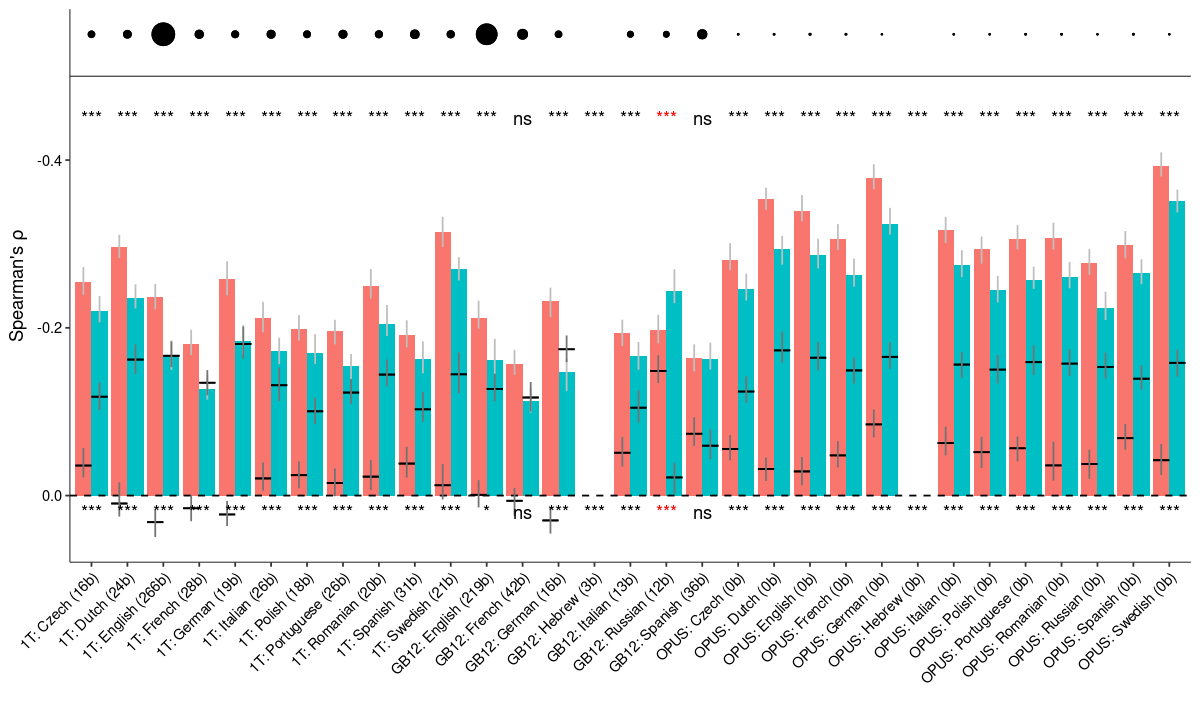

In [28]:
xv_list = c("Frequency")
yv_list = c("PIC - Phonemes","Number of Phonemes")
dodge <- position_dodge(width=0.9)

correlations = subset(nem_combined, xv %in% xv_list & yv %in% yv_list & !residualize)
partial_correlations = subset(nem_combined, xv %in% xv_list & yv %in% yv_list & residualize)
p_values = subset(nem_combined, xv %in% xv_list & yv == "Difference: PIC vs. No. Characters")
p_values$sig = mapply(sig_symbol, p_values$pvalue, p_values$direction)
correlations$yv = factor(correlations$yv, levels=yv_list)


print(nrow(correlations))
print(nrow(partial_correlations))

crosslinguistic_pic_phonemes = ggplot(correlations 
) + geom_bar(aes(x=languageLabel, y=singleCor, fill=yv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme(panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), axis.line.x = element_line(color="black", size = .25),
    axis.line.y = element_line(color="black", size = .25)) + geom_hline(aes(yintercept = 0), linetype = 'dashed') + ylab(expression(paste("Spearman's ",rho))) + xlab(''
) +  theme(legend.position="none")  + geom_point(aes(x= languageLabel, y=-.55, size=numTokens)) + scale_size_area(
) + geom_hline(aes(yintercept = -.5), size=.25) +  geom_linerange(aes(x=languageLabel, 
ymin=lower, ymax=upper, fill=yv), position=dodge, colour='gray') + scale_y_continuous( breaks = seq(.1,-5,-.1)) + scale_y_reverse(


) + geom_errorbar(data = partial_correlations, aes(x=languageLabel,
ymin=singleCor, ymax=singleCor, fill=yv), position='dodge') +  geom_linerange(data=partial_correlations, aes(
x=languageLabel, ymin=lower, ymax=upper, fill=yv), position=dodge, colour='gray45'
) + geom_text(data=subset(p_values, direction == 'lower' & !residualize), 
    aes(x=languageLabel, y=-.45, label=sig)
) + geom_text(data=subset(p_values, direction == 'lower' & residualize),
    aes(x=languageLabel, y=.02, label=sig)
) + geom_text(data=subset(p_values, direction == 'higher' & !residualize),
    aes(x=languageLabel, y=-.45, label=sig), colour='red'
) + geom_text(data=subset(p_values, direction == 'higher' & residualize),
    aes(x=languageLabel, y=.02, label=sig), colour='red')


pdf('figures/crosslinguistic-pic-phonemes', width=10, height=5)
print(crosslinguistic_pic_phonemes)
dev.off()

options(repr.plot.width=10, repr.plot.height=6, jupyter.plot_mimetypes = 'image/png')
print(crosslinguistic_pic_phonemes)

In [ ]:
# looks very similar to crosslinguistic_pic3
# [ ] what is the next graph / graphs?

# Pattern Within Words of the Same Length

In [30]:
target_length = 8
eng = subset(books2012_withoutEndMarker[[which(books2012_languages == 'eng-all')]][['df']], !is.infinite(unigramSurprisal))
eng$logFrequency = log(eng$frequency)
#sample based on the frequency quantile
eng$freq_group =  ceiling(ecdf(eng$ipa_ss)(eng$ipa_ss)*50)
eng$ipa_ss_bits = -1 *log(10**(-1*eng$ipa_ss), base=2)

df = subset(eng, ipa_n == target_length+1 & ortho_n == target_length) #ipa lengths are off by one because of the end marker
df$length = target_length
dataset = do.call('rbind', lapply(split(df, df$freq_group), function(sub_df){
    return(sub_df[sample(1:nrow(sub_df),1),])
}))
print(dataset$word)

 [1] "commuted" "actuated" "inducted" "exacting" "distrust" "mandated"
 [7] "advances" "deviated" "resented" "deducted" "dictated" "existing"
[13] "protects" "degraded" "interact" "controls" "equality" "industry"
[19] "beholden" "upgraded" "maturity" "severest" "sensuous" "arguably"
[25] "figuring" "benefits" "magnetic" "flagrant" "fanatics" "didactic"
[31] "vigilant" "adequacy" "sporadic" "synonyms" "insomnia" "savagery"
[37] "pedagogy" "melanoma"


In [31]:
#remo = function(d){gsub("(^|[^0-9])0+", "\\1", d, perl = TRUE)}
getCor  = function(df){
    spearmans_at_length = cor(df$frequency, df$ipa_ss)
    return(paste("rho ==", round(spearmans_at_length, 3)))
}
enc_cors = ddply(subset(eng, ipa_n > 2 & ipa_n <= 14),.(ipa_n),getCor)
enc_cors$y_position = 15
enc_cors$y_position[which(enc_cors$ipa_n > 10)] = 4

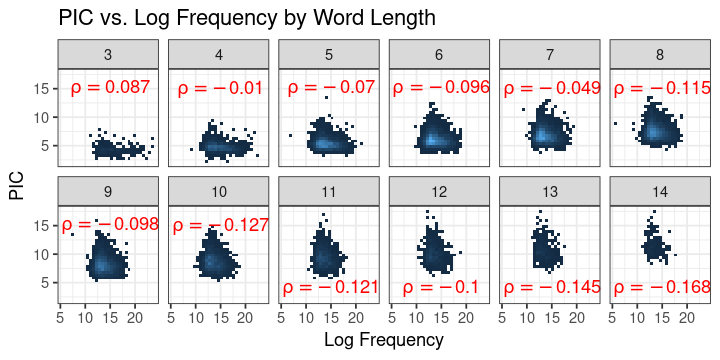

In [32]:
options(repr.plot.width=6, repr.plot.height=3)
p1 = ggplot(subset(eng, ipa_n > 2 & ipa_n <= 14)) + geom_bin2d(aes(x=log(frequency),y=ipa_ss)) + facet_wrap(~ipa_n, nrow=2,
) + theme_bw() + theme(legend.position="none")
p1 = p1 + geom_text(data=enc_cors,aes(x = 15, y = y_position,label=V1), parse = TRUE, inherit.aes=FALSE, colour='red')

p1 = p1 + xlab('Log Frequency') + ylab('PIC') + ggtitle('PIC vs. Log Frequency by Word Length')
print(p1)